In [36]:
library(tidyverse)
library(repr)
library(tidymodels)

In [37]:
weather <- read_csv("weatherAUS.csv", guess_max = 10000)

Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = ""),
  Location = col_character(),
  WindGustDir = col_character(),
  WindDir9am = col_character(),
  WindDir3pm = col_character(),
  RainToday = col_character(),
  RainTomorrow = col_character()
)

See spec(...) for full column specifications.



In [51]:
weather_Darwin <- weather %>%
                  filter(Location == "Darwin") %>%
                  select(Date, Evaporation, Sunshine, WindDir9am, WindSpeed9am, Humidity3pm, Pressure3pm, Rainfall, MinTemp, MaxTemp, RainTomorrow) %>%
                  mutate(RainTomorrow = as.factor(RainTomorrow)) %>%
                  mutate(WindDir9am = as.factor(WindDir9am)) %>%
                  drop_na()

weather_Darwin

Date,Evaporation,Sunshine,WindDir9am,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<date>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2008-07-01,4.4,11.0,ENE,13,32,1012.1,0,20.0,33.1,No
2008-07-02,6.0,10.4,SE,15,17,1012.4,0,19.4,32.4,No
2008-07-03,8.0,11.0,ESE,22,24,1013.0,0,18.2,31.8,No
2008-07-04,7.0,10.4,SE,22,16,1013.6,0,17.3,30.7,No
2008-07-05,7.0,10.8,E,20,16,1012.6,0,15.5,30.8,No
2008-07-06,7.2,10.7,ESE,11,18,1012.2,0,16.2,31.9,No
2008-07-07,5.2,7.8,SE,11,18,1013.1,0,17.0,32.7,No
2008-07-08,9.2,10.6,SE,20,12,1014.6,0,19.6,30.8,No
2008-07-09,9.6,10.6,SE,31,15,1015.2,0,17.3,29.2,No


In [52]:
set.seed(999)
weather_split <- initial_split(weather_Darwin, prop = 0.75, strata = RainTomorrow)  
weather_train <- training(weather_split)   
weather_test <- testing(weather_split)
weather_train
weather_test

Date,Evaporation,Sunshine,WindDir9am,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<date>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2008-07-01,4.4,11.0,ENE,13,32,1012.1,0,20.0,33.1,No
2008-07-03,8.0,11.0,ESE,22,24,1013.0,0,18.2,31.8,No
2008-07-04,7.0,10.4,SE,22,16,1013.6,0,17.3,30.7,No
2008-07-05,7.0,10.8,E,20,16,1012.6,0,15.5,30.8,No
2008-07-08,9.2,10.6,SE,20,12,1014.6,0,19.6,30.8,No
2008-07-09,9.6,10.6,SE,31,15,1015.2,0,17.3,29.2,No
2008-07-10,9.2,11.1,SE,17,14,1013.2,0,17.1,30.3,No
2008-07-11,8.0,10.9,ESE,20,11,1011.0,0,17.7,30.6,No
2008-07-12,7.0,11.0,E,13,40,1010.6,0,14.7,30.9,No


Date,Evaporation,Sunshine,WindDir9am,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<date>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2008-07-02,6.0,10.4,SE,15,17,1012.4,0.0,19.4,32.4,No
2008-07-06,7.2,10.7,ESE,11,18,1012.2,0.0,16.2,31.9,No
2008-07-07,5.2,7.8,SE,11,18,1013.1,0.0,17.0,32.7,No
2008-07-14,4.8,8.9,ESE,7,56,1012.1,0.0,18.8,31.0,No
2008-07-21,5.4,10.9,SE,22,36,1009.0,0.0,21.4,32.7,No
2008-07-24,10.8,10.5,SE,28,19,1010.3,0.0,17.3,29.1,No
2008-08-03,6.2,11.4,ESE,17,11,1010.9,0.0,18.8,34.1,No
2008-08-08,7.6,11.1,SE,19,13,1012.0,0.0,15.9,32.1,No
2008-08-10,8.0,8.7,SE,15,25,1011.9,0.0,18.1,32.4,No


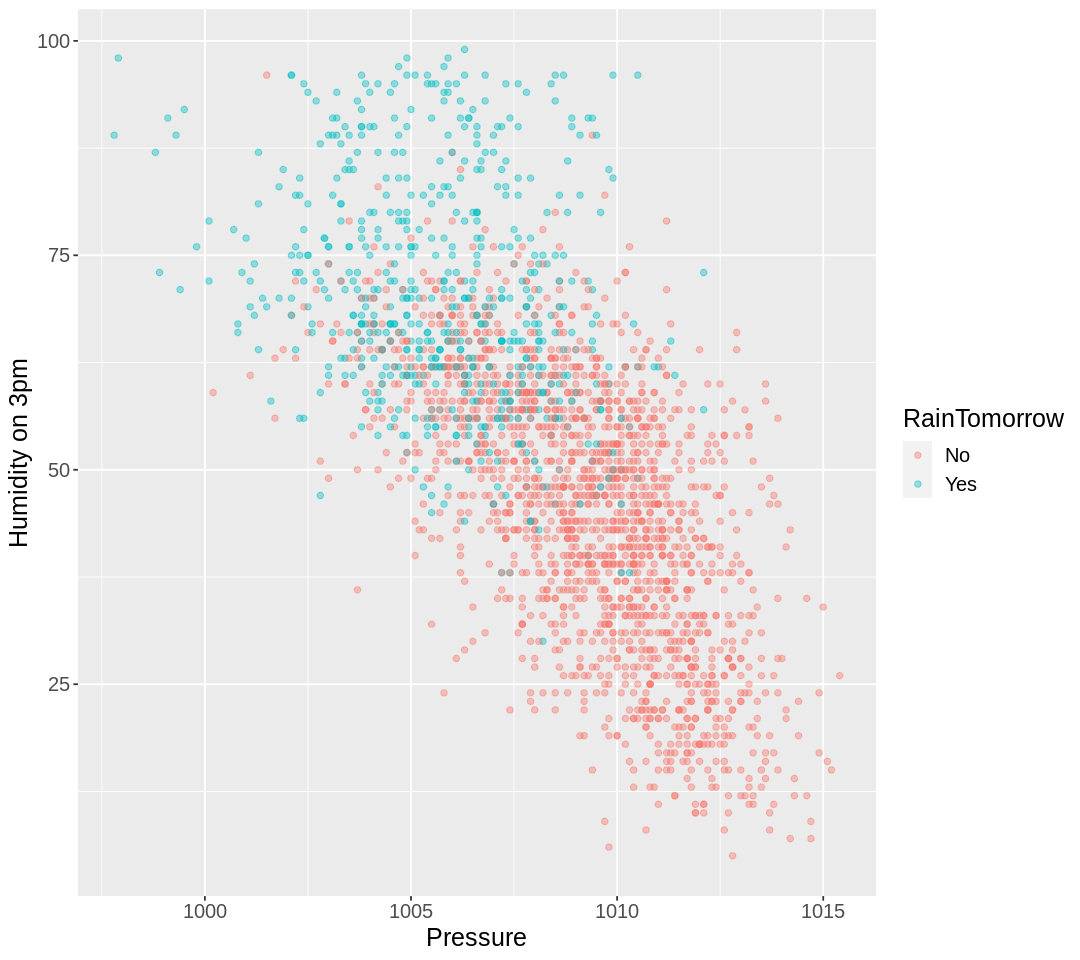

In [53]:
options(repr.plot.width = 9, repr.plot.height = 8)
weather_plot <- weather_train %>%
    ggplot(aes(x = Pressure3pm, y = Humidity3pm, color = RainTomorrow)) + 
        geom_point(alpha = 0.4) +
        labs(x = "Pressure", y = "Humidity on 3pm", color = "RainTomorrow") + 
        theme(text = element_text(size = 15))
        
weather_plot

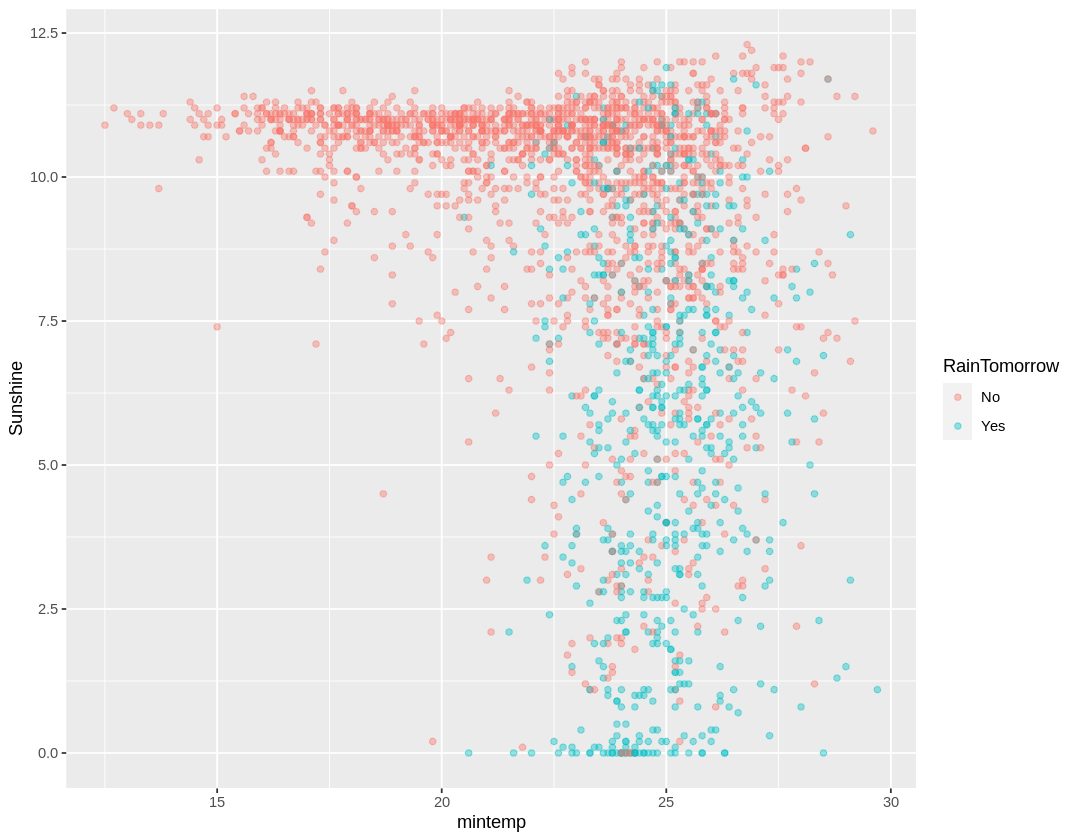

In [54]:
options(repr.plot.width = 9, repr.plot.height = 7)
weather_plot <- weather_train %>%
    ggplot(aes(x = MinTemp, y = Sunshine, color = RainTomorrow)) + 
        geom_point(alpha = 0.4) +
        labs(x = "mintemp", y = "Sunshine", color = "RainTomorrow") 
        
weather_plot

In [68]:
Wind_count <- weather_train %>% 
    group_by(WindDir9am, RainTomorrow) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) 
Wind_count

`summarise()` regrouping output by 'WindDir9am' (override with `.groups` argument)



WindDir9am,RainTomorrow,n
<fct>,<fct>,<int>
SE,No,326
E,No,294
ESE,No,210
ENE,No,143
NE,No,111
SSE,No,107
W,No,83
W,Yes,80
S,No,71


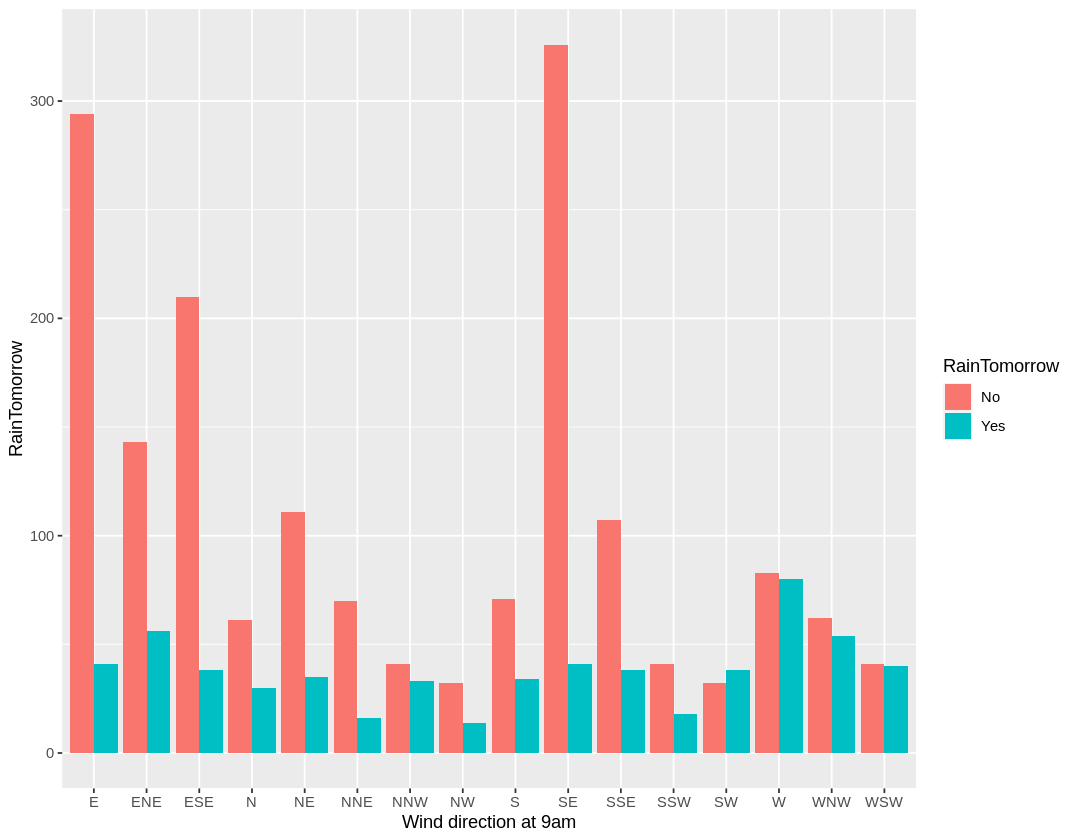

In [70]:
weather_plot <- ggplot(Wind_count, aes(x = WindDir9am, y = n, fill = RainTomorrow)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    xlab("Wind direction at 9am") +
    ylab("RainTomorrow") 

weather_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



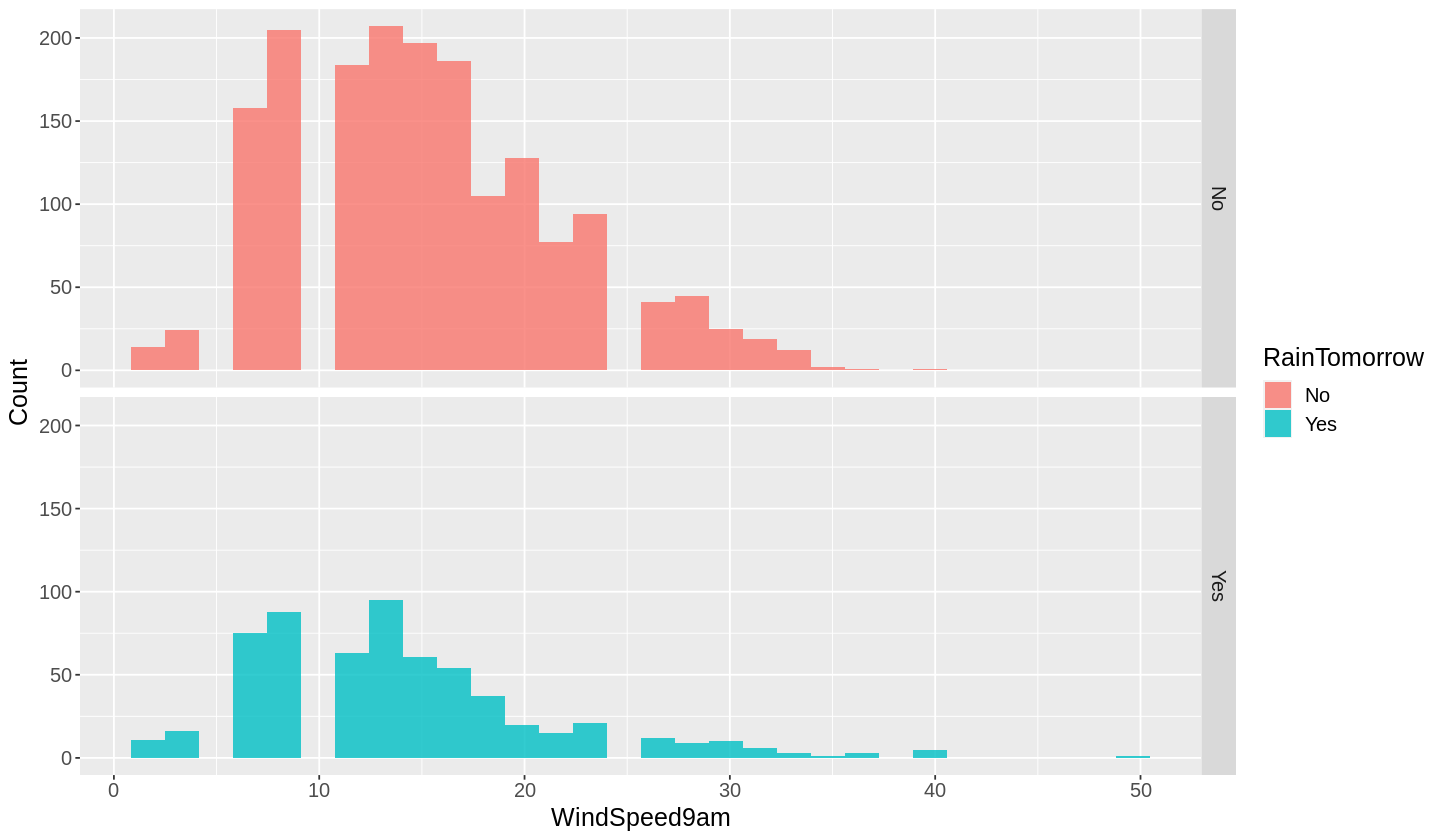

In [85]:
options(repr.plot.width = 12, repr.plot.height = 7)
weather_plot2 <- weather_train %>%
    ggplot(aes(x = WindSpeed9am, fill = RainTomorrow)) + 
        geom_histogram(alpha = 0.8) +
        facet_grid(rows = vars(RainTomorrow))+
        labs(x = "WindSpeed9am", y = "Count", color = "RainTomorrow") + 
        theme(text = element_text(size = 15))
weather_plot2